# Simple vs Log Returns and Normality Assumption

We will be looking at the difference between simple returns and log returns


Motivation: 
    
        - Simple returns:  The product of normally distributed variables is NOT normally distributed
        
        - Log returns:  The sum of normally distributed variables DOES follow a normal distribution
        
Later we will see why we have product or sum of returns!


In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

from pandas_datareader import data as pdr
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [2]:
end = dt.datetime.now()
start = dt.datetime(2020, 1, 1)

yf.pdr_override()
df = pdr.get_data_yahoo('TSLA', start, end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


# Simple Returns
**For one period**


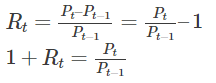

In [3]:
simple_returns = df.Close.pct_change()
simple_returns

Date
2020-01-02         NaN
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
                ...   
2023-07-24    0.034767
2023-07-25   -0.014049
2023-07-26   -0.003506
2023-07-27   -0.032684
2023-07-28    0.041316
Name: Close, Length: 899, dtype: float64

In [4]:
simple_returns.dropna()  # Due to formula, we cant have day 0 return ...

Date
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
2020-01-09   -0.021945
                ...   
2023-07-24    0.034767
2023-07-25   -0.014049
2023-07-26   -0.003506
2023-07-27   -0.032684
2023-07-28    0.041316
Name: Close, Length: 898, dtype: float64

#### To compute the return across multiple days (return singular) 
    
   It is called multi-period return:
    
          We have to multiply the different returns for each day to get the sum of returns over that period.
    

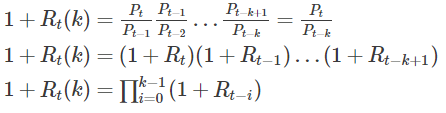

This is where the product comes from

In [5]:
df.Close.plot()

Testing the limitations of simple returns:

In [6]:
print('First', df.Close[0], 'last', df.Close[-1])

First 28.68400001525879 last 266.2749938964844


In [7]:
# Average across all above days:

simple_returns.mean()

0.003461502890118236

In [8]:
# Let's "try" to take close price and compute simple return everyday, This should give us our final stock price of TSLA

" We start from Close[0], and multiplying this everyday by .mean() and taking it to the power of day number, should give df.Close[-1]"

df.Close[0] * (1 + simple_returns.mean())**len(simple_returns)

df.Close[0] * (1 + 0.003423181203071985)**len(simple_returns)

619.2592779263339

In [9]:
df.Close[-1]

266.2749938964844

#### So it doesn't give the right price, we need to instead use the 3rd equation, taking the product of all the (1 + daily returns)


The mean() is no longer a useful statistic, it doesn't mean much to us (we cant use it like normally would).


**Below we do it the right way:**

In [10]:
# Let us do it the right way now, using 3rd eqt.

df.Close[0] * np.prod( [(1 + Rt) for Rt in simple_returns.dropna()] )
    

266.2749938964846

In [11]:
# Implementing the first equation to get the last return on day [-1]  (last day)


for i in range(0, len(simple_returns)):
    holder = 1
    if i > 0:
        a = df.Close[i]/df.Close[i-1]
        holder = holder * a
Rt = holder - 1
print(Rt)

0.04131628370116602


In [12]:
simple_returns[-1]

0.04131628370116602

# Log returns:

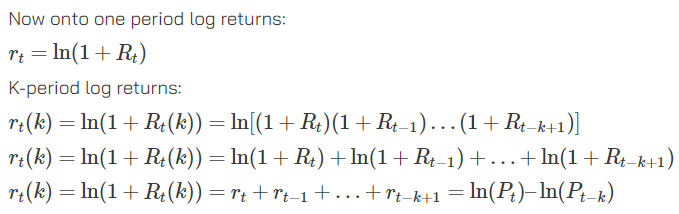

Log returns have the property: Adding the daily returns over time, it is descriptive of the dataset!

In [13]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()   # Log(Close[n] / Close[n-1])
log_returns

Date
2020-01-03    0.029203
2020-01-06    0.019072
2020-01-07    0.038067
2020-01-08    0.048033
2020-01-09   -0.022189
                ...   
2023-07-24    0.034176
2023-07-25   -0.014149
2023-07-26   -0.003512
2023-07-27   -0.033230
2023-07-28    0.040486
Name: Close, Length: 898, dtype: float64

In [14]:
log_returns.mean()

0.002481280745941079

In [15]:
df.Close[0] * np.exp(log_returns.mean() * len(log_returns))

266.27499389648443

### But! This isn't the main reason we use log returns!


– Simple Returns: The product of normally distribution variables is NOT normally distributed

– Log Returns: The sum of normally distributed variables follows a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality


In [16]:
log_returns.plot(kind='hist')

Is normality a good assumption for financial data?

In [17]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
log_returns_sorted

[-0.23651789445767657,
 -0.20552230217550044,
 -0.18845037343186985,
 -0.17476304366003273,
 -0.14586457137702016,
 -0.13713311629061195,
 -0.13058999220665155,
 -0.1299278575282087,
 -0.12772318728902374,
 -0.12349328402408655,
 -0.12277997465910719,
 -0.12113825810398889,
 -0.10915761260898618,
 -0.10873700220740792,
 -0.10254036525166675,
 -0.1024426640636013,
 -0.09672413884722543,
 -0.0951126361970946,
 -0.0945727929773044,
 -0.09302311928148893,
 -0.09008354847845335,
 -0.08937612559287707,
 -0.08927688581957327,
 -0.08695990905101429,
 -0.08615264955046516,
 -0.08446087652228773,
 -0.08402401628244031,
 -0.08396483835074355,
 -0.08328137479063667,
 -0.08144231364811663,
 -0.07845410579918498,
 -0.07752369493467591,
 -0.07665503512528221,
 -0.07436539035358274,
 -0.07366972655880115,
 -0.07254830168258311,
 -0.07241913725041024,
 -0.07184055905976201,
 -0.07176955888757142,
 -0.07082202204033466,
 -0.07053030781738932,
 -0.07043726926027942,
 -0.06987655465675016,
 -0.06878698522

In [18]:
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

In [19]:
# How many standard deviations is our best and worst?

std_worst = (worst - log_returns.mean()) / log_returns.std()
std_best = (best - log_returns.mean()) / log_returns.std()

In [20]:
print(' Std. dev. worst: %.2f and best: %.2f' %(std_worst, std_best))

 Std. dev. worst: -5.40 and best: 4.04


5.4 and 4.05 standard deviations away, quite far away! Gaussian/Normal has 97% of data within 3 std. dev.

Let us see the chances of this happening.

In [21]:
print(' Probability of worst %.13f and best %.13f' %(stats.norm(0, 1).pdf(std_worst), stats.norm(0, 1).pdf(std_best)))

 Probability of worst 0.0000001839931 and best 0.0001117377144


Quite a low likeliness to see financial moves like that!

# Testing for Normality

### Quantile-Quantile plots

Q-Q Plot


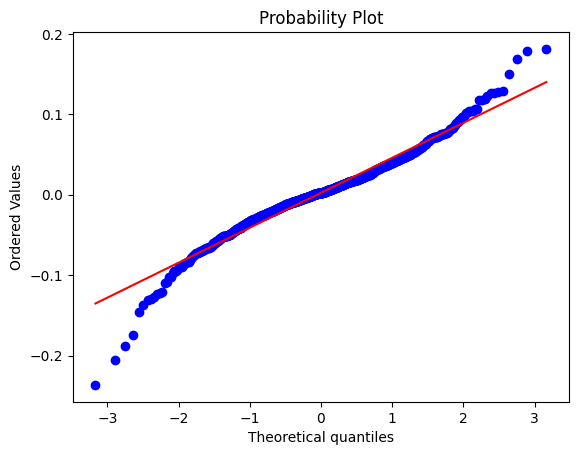

In [36]:
# For Gaussian/Normal
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q Plot')

Q-Q Plot


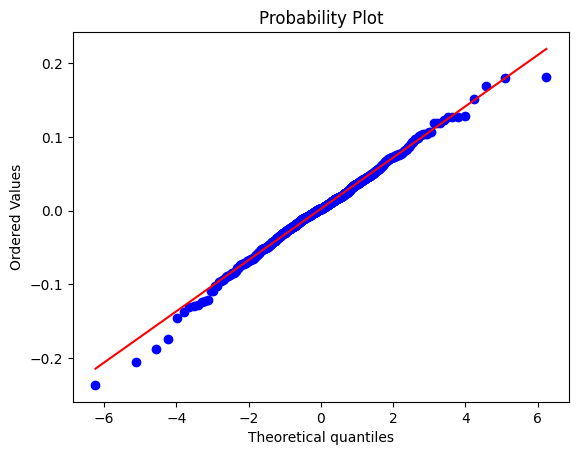

In [41]:
# For Student's T-dist, (dof, mean)
x = stats.nct(5, 0)

stats.probplot(log_returns, dist=x, plot=pylab)
print('Q-Q Plot')

### Box plots

In [42]:
# For Gaussian/Normal

log_returns.plot(kind='box')

We can see lots of outliers on the upper and lower lines

## Kolmogorov Smirnov test

The Kolmogorov Smirnov test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances.

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true. If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only.

In [55]:
ks_statistic, p_value = stats.kstest(log_returns, 'norm', args = (log_returns.mean(), log_returns.std()))
print(ks_statistic, p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

0.06076663356810319 0.002521012273035825
Probably not Gaussian


In [58]:
# Now trying the student's t-dist with 5 dof.

from scipy.stats import t

t = t.stats(5)


ks_statistic, p_value = stats.kstest(log_returns, t, args = (log_returns.mean(), log_returns.std()))
print(ks_statistic, p_value)
if p_value > 0.05:
    print('Probably Students t-dist')
else:
    print('Probably not Students t-dist')

0.5 0.503883327153628
Probably Students t-dist


Visually it looked like it fit better, and it does! just...